In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.integrate

Вычислить интеграл:

$$ I = \int_{0}^{3}{  sin(100x) \cdot e^{-x^{2}} \cdot cos(2x) \: dx} $$

In [3]:
def f(x):
    return np.sin(100*x) * np.exp(-(x**2)) * np.cos(2*x)

In [4]:
a = 0
b = 3
h = 1e-3  # шаг сетки
n = int((b - a) / h)  # количество узлов сетки
x = np.linspace(0, 3, n)
y = f(x)

In [5]:
n

3000

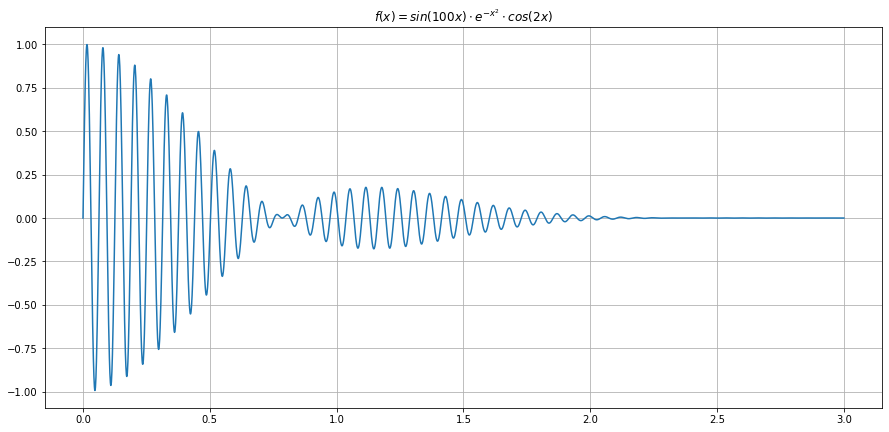

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(x, y)
plt.title(r'$ f(x) = sin(100x) \cdot e^{-x^{2}} \cdot cos(2x)$')
plt.grid()

**Метод трапеций**

In [7]:
def trap_int(x, f):
    s = 0
    for i in range(len(x) - 1):
        s += (f[i] + f[i+1]) * (x[i+1] - x[i]) * 0.5
    return s

In [8]:
print(trap_int(x, y))

0.009997757606796767


In [9]:
# сравним с функцией из scipy
a = scipy.integrate.trapz(y, x)
a

0.009997757606796767

**Экстраполяция Ричардсона**

In [10]:
J_h = trap_int(x, y)
J_h

0.009997757606796767

In [11]:
x1 = []
y1 = []
for i in range(len(x)):
    if i%2 == 0:
        x1.append(x[i])
        y1.append(y[i])

In [12]:
J_2h = trap_int(x1, y1)
J_2h

0.009972838206673275

Итог:

In [13]:
J_R = J_h + (J_h - J_2h) / 3
J_R

0.010006064073504597

**Метод Симпсона**


In [14]:
def simpson(x, y):
    a = x[0]
    b = x[-1]
    N = len(x) - 1
    h = (b-a) / N
    s1 = 0
    s2 = 0
    for i in range(1, N):
        if i%2 == 0:
            s1 += y[i]
        else:
            s2 += y[i]
    s = (h/3) * (y[0] + y[-1] + 2*s1 + 4*s2)
    return s

In [15]:
if n % 2 == 0:  # число отрезков должно быть четно
    n += 1
x = np.linspace(0, 3, n)
y = f(x)

In [16]:
n

3001

In [17]:
print(simpson(x, y))

0.010006103432455001


In [18]:
# сравним с функцией из scipy
b = scipy.integrate.simps(y, x)
b

0.010006103432455143

Сравним интеграл, полученный с помощью экстраполяции Ричардсона с методом Симпсона:

In [19]:
J_R

0.010006064073504597

In [20]:
S = simpson(x, y)
S

0.010006103432455001